In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
train_data = pd.read_csv('D:\\Downloads\\archive\\fraudTrain.csv')
test_data = pd.read_csv('D:\\Downloads\\archive\\fraudTest.csv')
print("Info of Train Data:")
print(train_data.info())
print("\nInfo of Test Data Info:")
print(test_data.info())

Info of Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14

In [5]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# 1. Data Cleaning 

In [6]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [5]:
test_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [7]:
# checking for missing data in both the dataset
print("Train data-> missing value")
print(train_data.isnull().sum())
print("-----------------------------------------------")
print("\nTest data-> missing value")
print(test_data.isnull().sum())

Train data-> missing value
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
-----------------------------------------------

Test data-> missing value
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street               

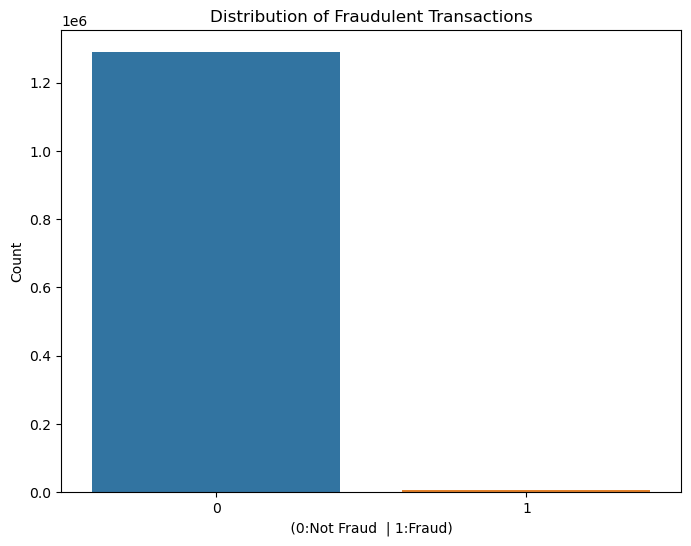

In [8]:
# Visualize the distribution of the target variable (fraudulent or not)
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel(' (0:Not Fraud  | 1:Fraud) ')
plt.ylabel('Count')
plt.show()

In [7]:
# check for duplicate values
test_data.duplicated().sum()
train_data.duplicated().sum()

0

In [8]:
test_data.shape

(555719, 23)

In [9]:
train_data.shape

(1296675, 23)

In [10]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [9]:
# Removing rows with missing values
# because it's just single row in each set,
# that's why there will no huge data loss.
cols_to_drop = ['Unnamed: 0','cc_num','merchant','first','last','trans_num','unix_time','street','category']
train_data.drop(columns=cols_to_drop,inplace = True)
test_data.drop(columns=cols_to_drop,inplace = True)

In [10]:
cols_to_drop = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','state']
train_data.drop(columns=cols_to_drop,inplace = True)
test_data.drop(columns=cols_to_drop,inplace = True)

In [11]:
# converting categorical data into numerical form
train_data.gender =[ 1 if value == "M" else 0 for value in train_data.gender]
test_data.gender =[ 1 if value == "M" else 0 for value in test_data.gender]

# 2. Performing EDA


In [18]:
train_data.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [12]:
print(test_data['is_fraud'].value_counts())
print(train_data['is_fraud'].value_counts())

0    553574
1      2145
Name: is_fraud, dtype: int64
0    1289169
1       7506
Name: is_fraud, dtype: int64


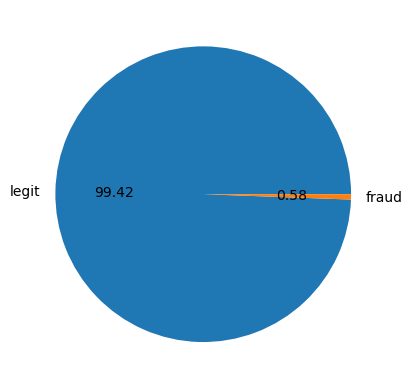

In [13]:
plt.pie(train_data['is_fraud'].value_counts(), labels=['legit','fraud'],autopct="%0.2f")
plt.show()

In [14]:
train_data.head()

,amt,gender,zip,city_pop,is_fraud
0,4.97,0,28654,3495,0
1,107.23,0,99160,149,0
2,220.11,1,83252,4154,0
3,45.00,1,59632,1939,0
4,41.96,1,24433,99,0


In [15]:
legit = train_data[train_data.is_fraud == 0]
fraud = train_data[train_data.is_fraud == 1]

In [15]:
fraud.shape

(7506, 5)

In [16]:
legit.shape

(1289169, 5)

In [16]:
legit_sample = legit.sample(n=len(fraud), random_state=2)
train_data = pd.concat([legit_sample, fraud], axis=0)

In [18]:
train_data['is_fraud'].value_counts()

0    7506
1    7506
Name: is_fraud, dtype: int64

# 3. Data Splitting

In [17]:
# split data into training and testing set

X = train_data.drop('is_fraud',axis=1)
# X_test = test_data.drop('is_fraud',axis=1)
Y = train_data['is_fraud']
# y_test = test_data['is_fraud']

In [20]:
X.shape

(15012, 4)

In [21]:
Y.shape

(15012,)

In [18]:
# storing 80% data in X and Y train for training the data and the remaining 20% data is for testing
# stratify we are using when the value of X_train and Y_train as well as X_test and Y_test are same respectively 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

# 4. buliding model

In [31]:
#  logistic regression-> classify the true and false i.e 0 and 1
# creating object of LR model-> train LR model
model = LogisticRegression()
model.fit(X_train, Y_train)
ypred = model.predict(X_test) 
# comparision of 20% of Y_test and 20% of ypred that model are prepared on the basis of 80% X_train and Y_train 

In [24]:
accuracy_score(ypred, Y_test)

0.7812187812187812

In [19]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression()

In [20]:
gnb.fit(X_train,Y_train)
ypred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,ypred1))

0.8451548451548452


In [21]:
mnb.fit(X_train,Y_train)
ypred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,ypred2))


0.5934065934065934


In [22]:
bnb.fit(X_train,Y_train)
ypred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,ypred3))

0.5251415251415251


In [ ]:
#  we are moving forward with the bnb

In [23]:
svc = SVC(kernel='sigmoid', gamma=1.0)

dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [24]:
clfs = {
    'SVC' : svc,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc
}

In [25]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,Y_train)
    ypred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,ypred)
    
    return accuracy

In [26]:
accuracy_scores = []

for name,clf in clfs.items():
    
    current_accuracy = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    
    accuracy_scores.append(current_accuracy)

For  SVC
Accuracy -  0.49983349983349984
For  DT
Accuracy -  0.8847818847818848
For  LR
Accuracy -  0.8524808524808525
For  RF
Accuracy -  0.8931068931068931


In [29]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy', ascending = False)

In [30]:
performance_df

,Algorithm,Accuracy
3,RF,0.893107
1,DT,0.884782
2,LR,0.852481
0,SVC,0.499833


In [33]:
import pickle
pickle.dump(train_data, open('train.pkl', 'wb'))
pickle.dump(bnb, open('rf.pkl', 'wb'))